In [2]:
import sys
sys.path.append("/home/pi/Documents/flexure_exp_proj/src")

In [4]:
import signal
import time
import os
import matplotlib.pyplot as plt
import gpiozero as io
import numpy as np
from ADXL362 import ADXL362

In [3]:
accel = ADXL362()
accel.begin_measure()

In [6]:
time.time()

1716575045.8717449

In [18]:
def measure(accel, duration=10, increment=0.001)->np.ndarray:
    n_take = int(duration // increment)
    res = np.zeros((n_take, 4))
    counter = 0
    target_time = time.time() + increment
    while counter < n_take:
        if time.time() < target_time:
            continue
        else:
            res[counter] = accel.read_txyz()
            counter += 1
            target_time += increment
    res[:, 0] -= res[0, 0] # shift time to start at 0
    return res

In [19]:
res = measure(accel, duration=5)
res = res.T

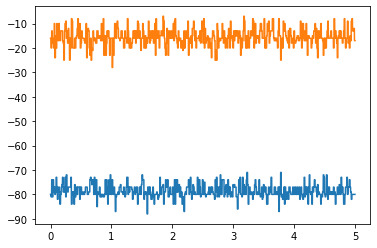

In [20]:
plt.plot(res[0], res[1])
plt.plot(res[0], res[2])

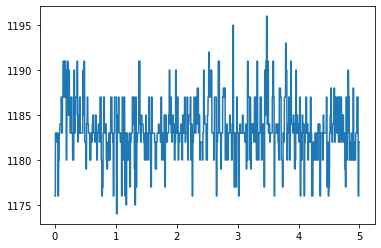

In [21]:
plt.plot(res[0], res[3])


In [5]:
# test_res = np.load("test_measure.npy")
test_res_1 = np.load("test_measure_2.npy")

(0.0, 0.002)

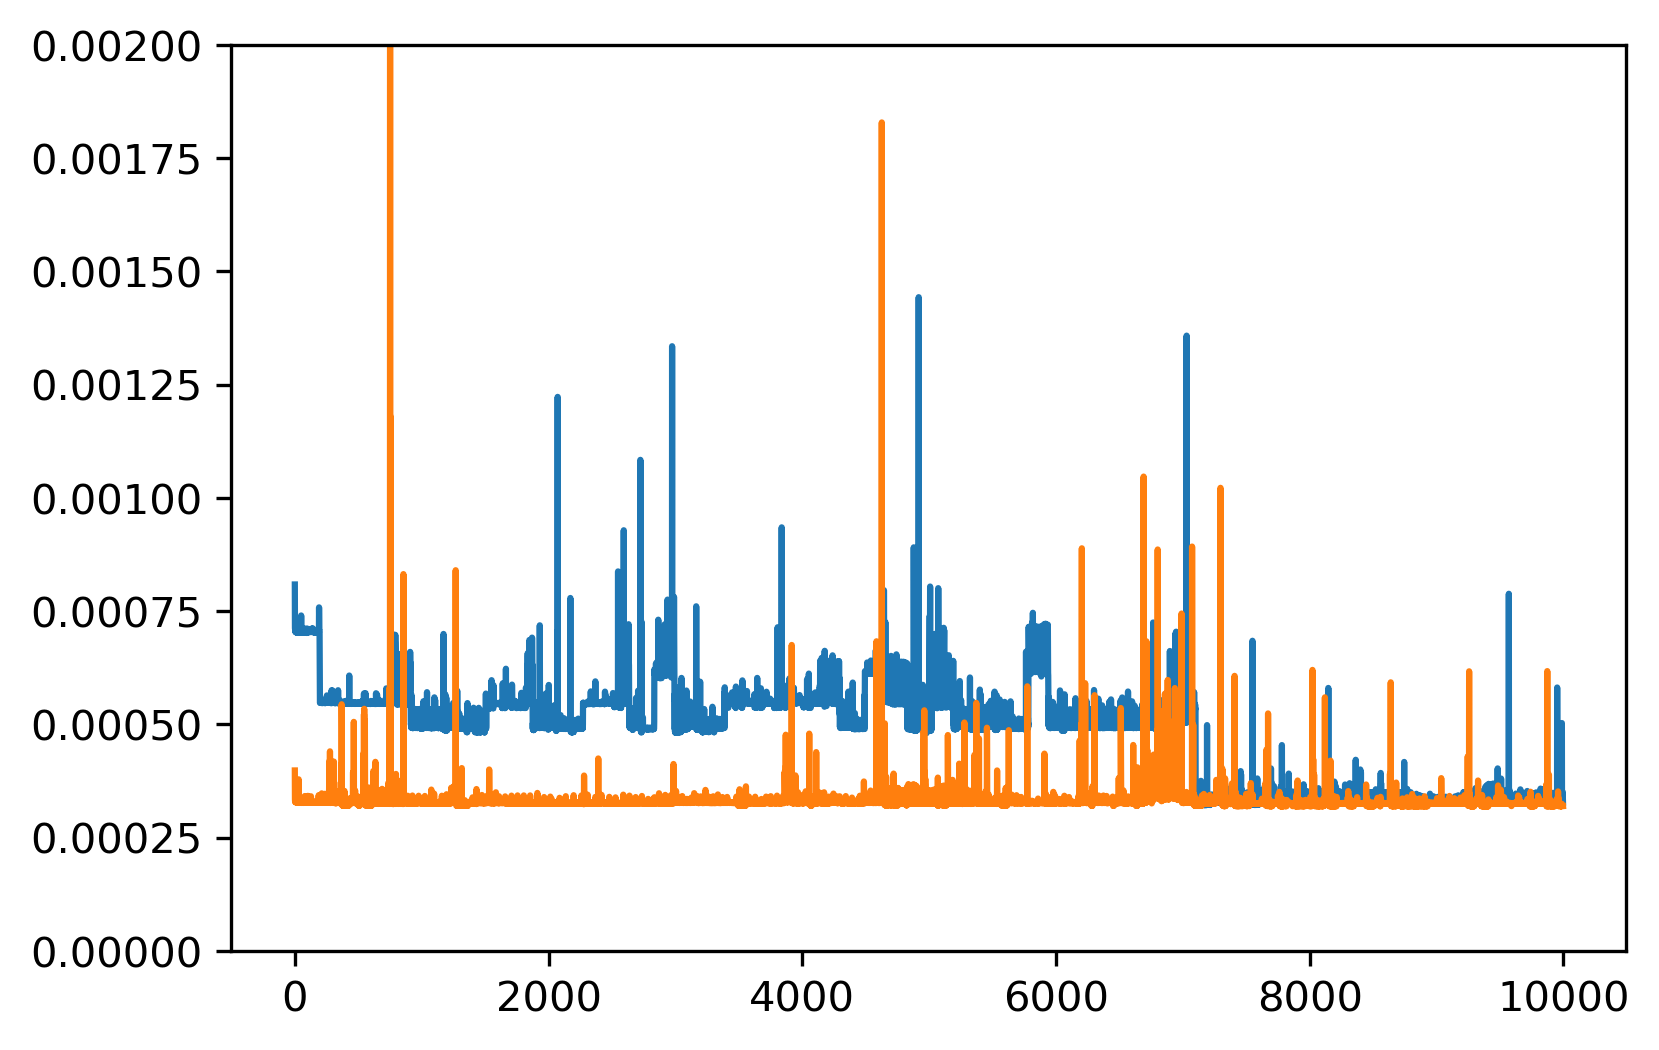

In [34]:
plt.figure(dpi=300)
plt.plot(np.diff(test_res[:, 0]))
plt.plot(np.diff(test_res_1[:, 0]))
plt.ylim(0, 2e-3)
# plt.plot(np.diff(res[0]))

In [12]:
test_res_1[:40, 1]


array([ 23.,  23.,  23.,  23., -77., -77., -77., -77., -77., -77., -77.,
       -77., -77., -77., -61., -61., -61., -61., -61., -61., -61., -61.,
       -61., -61., -52., -52., -52., -52., -52., -52., -52., -52., -52.,
       -52.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.])